# Flights Data

[Detailed flight records on delayed flights in the united states](https://www.kaggle.com/datasets/vishwanathmuthuraman/domestic-flight-data)

## dataset

In [ ]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import math
import plotly.express as px
from scipy.stats import norm

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
#from google.colab import drive

***Reading dataset***

In [ ]:
df = pd.read_csv("transport_data_2015_january.csv")
df.head(2)

,Unnamed: 0,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0


In [ ]:
df.shape

(182940, 15)

## Exploratory Data Analysis and Statistical Analysis

### Distributions

In [ ]:
# first we will be looking a distributions of airlines that are late 
# Before that lets create a column to find the flights that are late and not early as the arrival column has both values as of this moment.

df['delayed'] = df['arr_delay'].apply(lambda x:x>0)

# Now that we have a series of True or False values against delayed flights. we can use them to count the number of delayed flights by airlines.
delayed_flights = df[df['delayed']==True]

dis_1 = delayed_flights['unique_carrier'].value_counts()
pd.DataFrame(dis_1)

,unique_carrier
WN,21150
OO,10804
EV,10771
AA,9841
DL,9803
UA,8624
US,6353
B6,4401
AS,2104
NK,1877


##### Distribution of unique carriers that are delayed

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


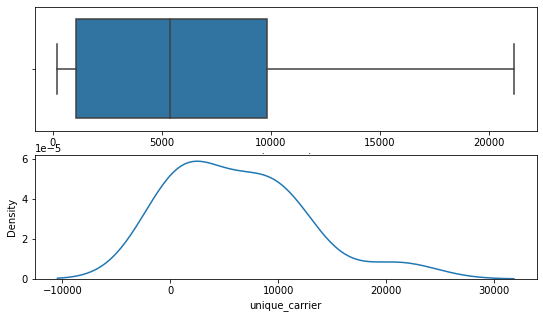

In [ ]:
# density plot showign distribution of delayed carriers 
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(dis_1)

plt.subplot(212)
sns.kdeplot(dis_1)

##### Proportions

In [ ]:
# lets visualize their proportions next 
# size() counts along a axis and the unstack() pivots the inner most levels

proportion = df.groupby(['unique_carrier','delayed']).size().unstack()
proportion.reset_index()

# Now lets add a column for total and percentage of delayed flights 

proportion['total_flights'] = proportion[True]+proportion[False]

proportion['percent_delayed'] = proportion[True]/proportion['total_flights']*100


# Now lets find the proportion of these flights 

proportion['proportion_d'] = proportion[True]/proportion['total_flights']
proportion.sort_values('proportion_d',ascending=False)

	

delayed,False,True,total_flights,percent_delayed,proportion_d
unique_carrier,,,,,
F9,150,297,447,66.442953,0.664430
HA,170,242,412,58.737864,0.587379
NK,1351,1877,3228,58.147460,0.581475
MQ,160,202,362,55.801105,0.558011
AA,8912,9841,18753,52.476937,0.524769
UA,7885,8624,16509,52.238173,0.522382
OO,9977,10804,20781,51.989798,0.519898
EV,10114,10771,20885,51.572899,0.515729
WN,21789,21150,42939,49.255921,0.492559


#### Inference :

###### The above table shows a different perspective compared to the first table. In the first table WN ( south west airlines) had the most number of delayed flighs but here it barely crosses the middle of the pack with respect to percent of delayed flights in their respective airlines.

#### Displot of delay Time

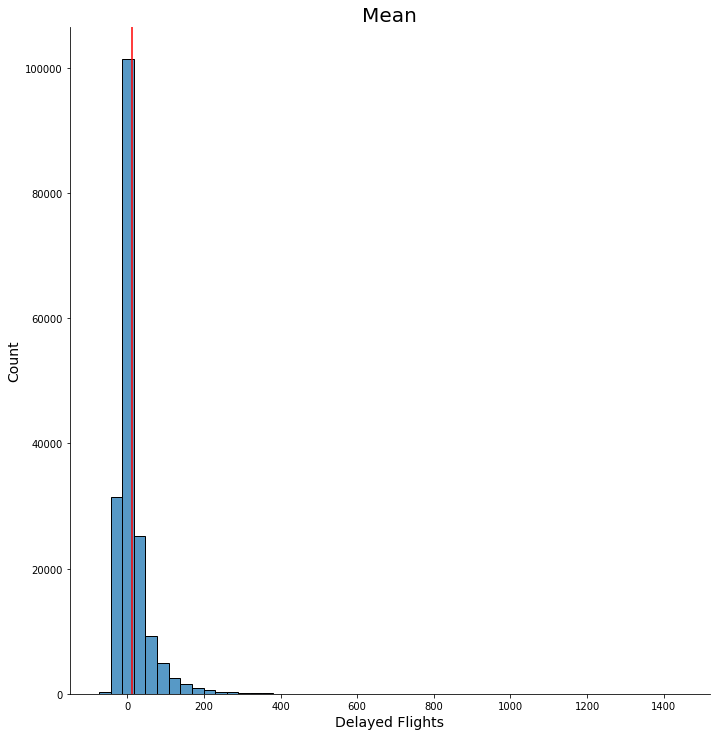

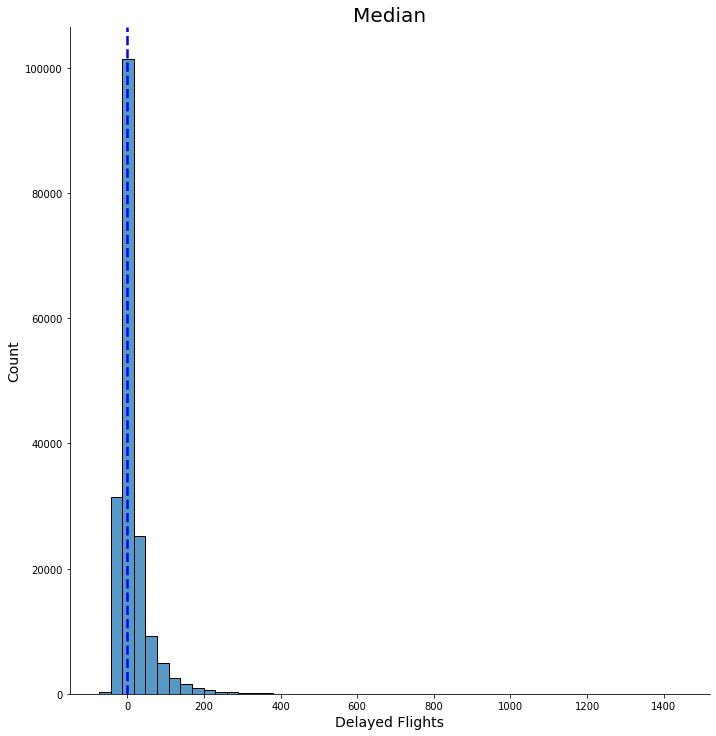

In [ ]:
sns.displot(df,
            x = 'arr_delay',
            bins=50,
           height=10)
plt.title('Mean',size=20)
plt.xlabel("Delayed Flights", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=df.arr_delay.mean(),
            color='red')

sns.displot(df,
            x = "arr_delay",
            bins=50,
           height=10)
plt.title('Median',size=20)
plt.xlabel("Delayed Flights", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=df.arr_delay.median(),
            color='blue',
            ls='--', 
            lw=2.5)

### Location

* Mean
* Median
* Mode
* Percentiles

In [ ]:
# Mean  gives you an average of how long each flight was delayed for

mean_delay = df.pivot_table(columns='unique_carrier' , values='arr_delay', aggfunc=np.mean).value_counts(ascending=False)
pd.DataFrame(mean_delay)

,,,,,,,,,,,,,,0
AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,
15.616299,1.731951,13.576129,4.118949,18.167116,33.497738,8.260341,30.297468,22.632436,19.031663,16.094772,7.671557,3.833908,11.273536,1


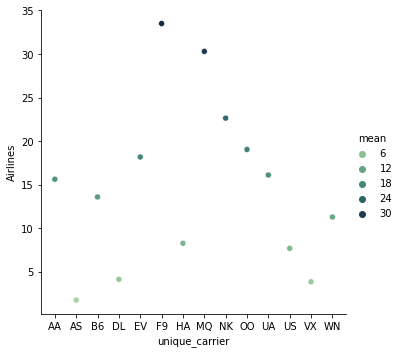

In [ ]:
mean_1 = df.groupby('unique_carrier')['arr_delay'].mean().reset_index(name='mean') 
harker = sns.relplot(x="unique_carrier", y="mean", hue= 'mean',palette="ch:r=-.5,l=.75",data=mean_1)
harker.set_titles("Distribution Scatter Plot of Mean ")
harker.set_ylabels("Mean", clear_inner=False)
harker.set_ylabels("Airlines", clear_inner=False)


In [ ]:
south_west = df[df['unique_carrier'] == 'WN']['arr_delay']
south_west.describe()

count    42020.000000
mean        11.273536
std         36.438970
min        -55.000000
25%         -9.000000
50%          1.000000
75%         19.000000
max        535.000000
Name: arr_delay, dtype: float64

#### Inference

* count: there are 42,020 rows in the dataset, which is filtered to only show Southwest (WN).
* mean: the average time a flight is delayed in this particular airline.
* std: the standard deviation.
* min: the shortest delay in the dataset. 
* 25%: the 25th percentile. 25% of delays were lower than -9.00. ( - meaning it was early )
* 50%: the 50th percentile, or the median. 50% of delays were lower than 1.00.
* 75%: the 75th percentile. 75% of delays were lower than 19.00.
* max: the longest delay in the dataset: 535.00.

### Histogram

##### South west airlines delay histogram

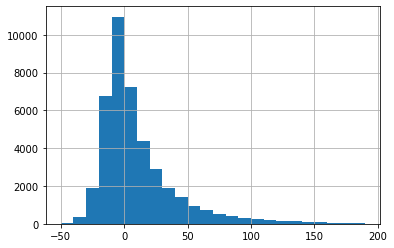

In [ ]:
# setting up the bins parameter
bin_values = np.arange(start=-50, stop=200, step=10)

# histogram to display flight delays every 10 mins

south_west_hist = df[df.unique_carrier=='WN']
south_west_hist.arr_delay.hist(bins=bin_values)

##### South west airlines Vs US airlines Vs Envoy airlines delay histogram

unique_carrier
MQ    AxesSubplot(0.125,0.125;0.775x0.755)
US    AxesSubplot(0.125,0.125;0.775x0.755)
WN    AxesSubplot(0.125,0.125;0.775x0.755)
Name: arr_delay, dtype: object

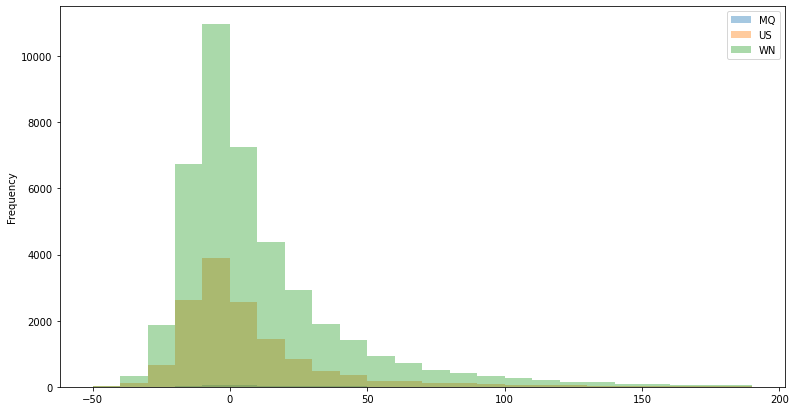

In [ ]:
# subsetting data frame for south west and US airlines and Envoy 

WN_US_airlines = df['unique_carrier'].isin(['WN','US','MQ'])
WN_US_airlines_df = df[WN_US_airlines]

# Create a stacked histogram with both US and WN airlines

stacked_hist = WN_US_airlines_df.groupby('unique_carrier')['arr_delay']
stacked_hist.plot(kind='hist',bins=bin_values,figsize=[13,7],alpha=0.4,legend=True)

In [ ]:
des = stacked_hist.describe()
des

,count,mean,std,min,25%,50%,75%,max
unique_carrier,,,,,,,,
MQ,316.0,30.297468,57.461541,-45.0,-5.0,11.5,39.0,359.0
US,13972.0,7.671557,34.672795,-59.0,-10.0,-1.0,13.0,621.0
WN,42020.0,11.273536,36.438970,-55.0,-9.0,1.0,19.0,535.0


From the above table you can infere that the delays on Envoy airlines are more than the other two airlines meaning the values are spread out. We arrive at this conclusion by looking at the standard deviation , you clearly see the gap between Envoy and the other airlines.

### Variance

##### Standard Deviation
Simply put standard deviation is the square root of Variance , and in this case is shows how the flight delays are spread out.

In [ ]:
envoy_air = print ('Envoy Air'), des.loc['MQ']['std'], 'minutes from the mean', des.loc['MQ']['mean']
US_air = print ('US Airways'), des.loc['US']['std'], 'minutes from the mean', des.loc['US']['mean']
south_west_air = print ('South West Airways'), des.loc['WN']['std'], 'minutes from the mean', des.loc['WN']['mean']

envoy_air,US_air,south_west_air



Envoy Air
US Airways
South West Airways


((None, 57.46154098162633, 'minutes from the mean', 30.29746835443038),
 (None, 34.67279466146994, 'minutes from the mean', 7.671557400515316),
 (None, 36.438969785966094, 'minutes from the mean', 11.273536411232746))

* As you can see above Envoy airways has a 35.6 mean value and 58.4 deviation , meaning 68.2% of the flights at envoy airlines are between 23 (58.444 - 35.627) minutes early or 93 (58.444 + 35.627) minutes delay.

* As you can see above US airways has a 7.6 mean value and 34.6 deviation , meaning 68.2% of the flights at US airlines are between 27 (34.6 - 7.6) minutes early or 42 (34.6 + 7.6) minutes delay.

* As you can see above South west airways has a 11.2 mean value and 36.4 deviation , meaning 68.2% of the flights at South west airlines are between 25 (36.4 - 11.2) minutes early or 47 (36.4 + 11.2) minutes delay.

* From the above information we can infer that US airlines has the lowest dispersion rate among all airlines compared.

### Box Plots

##### Lets look at box plots of high volume airports

In [ ]:
# lets look at flight delays segregated by airports
crowded = df.origin.value_counts()[:20]

# lets convert this to list so we can use this list with the isin() function.
airport_list = crowded.index.tolist()

# lets subset for busiest airports

busy_airports = df[df.origin.isin(airport_list)]

# Lets look at the airport of origin for these long flight delays

top_volume = busy_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')

# Summary statistics of these busy airports

top_volume.describe()

origin,ATL,BOS,BWI,CLT,DEN,DFW,DTW,EWR,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,6.808492,11.600570,16.199541,7.275782,22.511014,15.764050,14.122590,17.113804,11.267747,13.200185,11.483188,11.242372,16.560292,10.677177,9.175924,32.356552,8.879827,6.527813,11.436430,4.741233
std,12.839110,15.068289,20.807723,7.375595,16.109874,12.183788,14.951694,18.807808,11.476093,22.583269,11.850080,10.143112,23.701809,12.191032,14.897623,26.218603,6.967552,4.716006,8.792576,5.692669
min,-5.519074,-9.578073,-7.718182,-1.743191,-0.306723,1.509434,-6.851064,-5.643885,-0.602978,-16.319672,-3.634831,-2.926874,-12.550633,-2.881967,-7.868687,-0.103627,-1.129496,-2.720339,0.264438,-5.649254
25%,0.330943,3.443636,10.352697,0.455975,14.723562,7.065056,0.822660,0.682540,1.769231,1.353982,4.010471,5.239051,-2.710247,0.530201,0.953642,13.917108,2.127610,4.586207,5.249377,1.342466
50%,2.733871,8.233227,11.995984,5.769784,21.275797,11.284906,19.951456,15.051546,8.426195,3.003509,10.695890,8.223404,13.672727,8.524691,6.925170,28.318182,8.073903,7.353383,9.342105,3.885417
75%,5.405751,20.996732,19.968889,13.294964,29.695572,26.042435,23.176101,22.928328,17.227723,31.074906,17.163539,16.297125,33.746324,16.106195,17.719178,40.722028,13.261641,9.429119,12.840611,7.255245
max,42.433771,43.455479,76.201794,22.619938,52.272085,36.548803,33.154574,53.919231,39.860190,52.609929,41.575000,27.531561,62.646617,37.266082,47.234483,89.179592,19.472406,13.750853,28.067669,13.808917


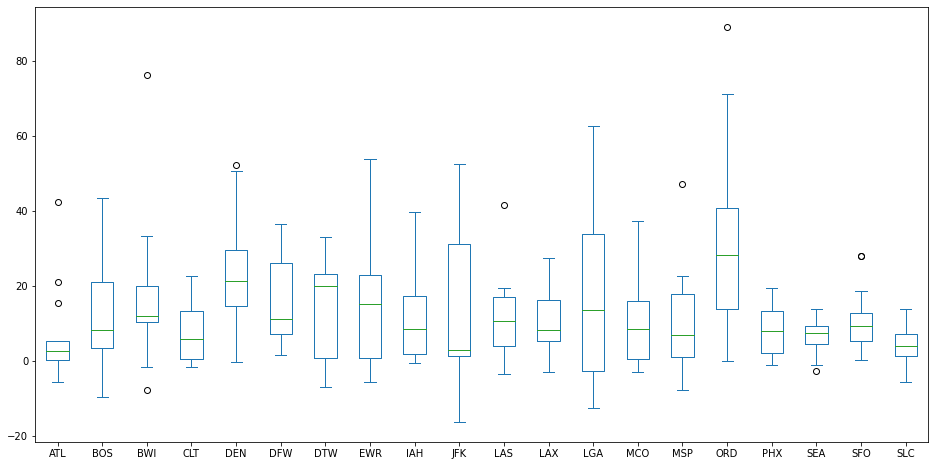

In [ ]:
box_plot_air = top_volume
box_plot_air.plot(kind='box', figsize=[16,8])

It simpler to compare the data now that its in a box plot , wouldnt you agree? . John F Kennedy airport (JFK) had a notable distriibution of delays while LGA ( Laguardia ) airport for example remained evenly distributed. ORD ( O'Hare airport) on the other had was a completely different story as it was 2-3 times more delayed than the rest though out.

### Covariance
##### covariance is defined as the directional relationship between two variables a and b

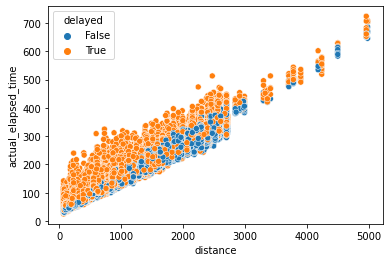

In [ ]:
# lets plot a scatter plot of diffrent dimmensions in the data frame to see how they relate to each other. First we will start with columns distance and actual_elapsed_time

sns.scatterplot(data=busy_airports,x='distance',y='actual_elapsed_time',hue='delayed')

As you can see there is a positive covariance between distance and actual time elapsed. In ther words these variables tend to move in the same direction either upward or down ward.

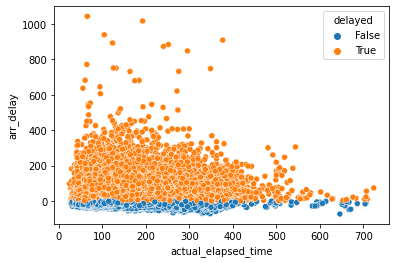

In [ ]:
# Now lets look at two more variables 

sns.scatterplot(data=busy_airports,y='arr_delay',x='actual_elapsed_time',hue='delayed')

Now this plot has a negative covariance , as the elapsed time increases the arrival delay also decreases to an extent.

### Correlation

The correlation between two random variables measures both the strength and direction of a linear relationship that exists between them. There are two ways to measure correlation:

* Pearson Correlation Coefficient — captures the strength and direction of the linear association between two continuous variables

* Spearman’s Rank Correlation Coefficient—determines the strength and direction of the monotonic relationship which exists between two ordinal (categorical) or continuous variables.


                     Unnamed: 0  flight_num  arr_delay  cancelled  distance  \
Unnamed: 0             1.000000    0.476096   0.045627   0.058790 -0.202328   
flight_num             0.476096    1.000000   0.056916   0.078318 -0.348748   
arr_delay              0.045627    0.056916   1.000000        NaN -0.029829   
cancelled              0.058790    0.078318        NaN   1.000000 -0.058064   
distance              -0.202328   -0.348748  -0.029829  -0.058064  1.000000   
carrier_delay          0.017753    0.026459   0.581264        NaN  0.018629   
weather_delay         -0.013368   -0.011653   0.277266        NaN -0.003022   
late_aircraft_delay    0.007837    0.072593   0.553585        NaN -0.066743   
nas_delay              0.047434   -0.023785   0.245219        NaN  0.021806   
security_delay        -0.007169   -0.008506   0.004578        NaN  0.017302   
actual_elapsed_time   -0.180556   -0.321371   0.030945        NaN  0.964174   
delayed                0.033189    0.031859   0.5404

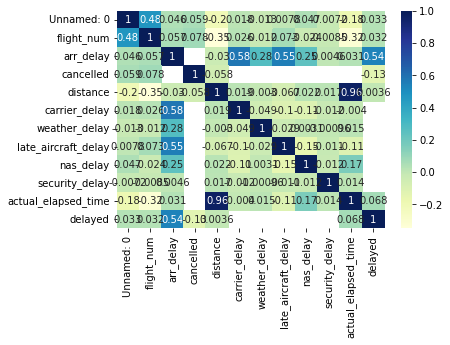

In [ ]:
# now lets show the correlation of the data through a heat map

print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

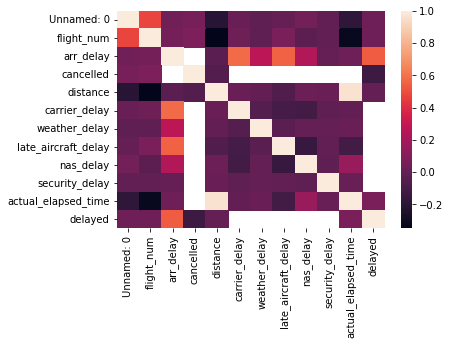

In [ ]:
# lets do another heatmap

dataplot=sns.heatmap(df.corr())
  
# displaying heatmap
plt.show()

As you can see from the above heat map flights delayed are highly correlated with different reasons such as security delay , national air system delay , weather delay , carrier delay , we can also observe the time elasped is highly correlated with the distance of the the travel and the time at which the flight arrives.

### EDA ( Explanatory Data Anslysis )

##### 1. Total number of flights delayed by airlines 

In [ ]:
# Total flights delayed per their respective carrier.

proportion1= proportion.reset_index()

proportion1.unique_carrier.replace({'AA':'American Airlines Inc',
'OO': 'SkyWest Airlines Inc',
'DL': 'Delta Air Lines Inc',
'NK': 'Spirit Air Lines',
'HA': 'Hawaiian Airlines Inc',
'WN': 'Southwest Airlines Co',
'B6': 'JetBlue Airways',
'US': 'US Airways Inc',
'AS' :'Alaska Airlines Inc',
'MQ' :'Envoy Air',
'F9' :'Frontier Airlines Inc',
'VX': 'Virgin America',
'EV': 'ExpressJet Airlines Inc',
'UA': 'United Air Lines Inc'},inplace=True)

size1 = proportion['percent_delayed']/2

fig = px.scatter(proportion1, x="percent_delayed", y=True,
             size=size1, color="unique_carrier",
                 hover_name="unique_carrier", log_x=True, size_max=60,labels={
                     "percent_delayed": "Delayed Flights Percentage %",
                     "True": "Total flights Delayed ",
                     "unique_carrier": "Airlines"
                 },
                title="Airlines to avoid")
fig.show()

##### 2. Find the airport with the most amount air traffic in other words late or delayed flights

In [ ]:
# plot the most busy airports with the largest number of delayed flights

df2 = df.dropna()

# subset for delayed flights and groub by origin destination to get a count of delayed flights from that particular location

df2 =df2[['origin','delayed','arr_delay']]
plot1 = df2[df2['delayed']==True].groupby('origin').size().reset_index(name='counts')
plot1

# plot
fig = px.scatter(plot1,x='origin',y='counts',size='counts', color='counts',hover_name='origin',labels={
                     "origin": "Origin Airport",
                     "counts": "Number of delayed Flights",
                     
                 },
                title="Airports to avoid")
fig.show()


##### 3. Delayed Flights by Day of week

In [ ]:
from datetime import datetime
days = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday',5: 'Saturday', 6:'Sunday'}
df3 = delayed_flights[['flight_date','arr_delay','delayed']]
df3['flight_date'] = pd.to_datetime(df3['flight_date'])
df3['flight_day'] = df3['flight_date'].dt.weekday
df3['flight_day'] = df3.flight_day.replace(days)

df4=df3
df4 = df4.groupby('flight_day').size().reset_index(name='counts')
df4

<ipython-input-23-1158d0c5bc44>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-1158d0c5bc44>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-1158d0c5bc44>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,flight_day,counts
0,Friday,14085
1,Monday,15721
2,Saturday,12636
3,Sunday,15698
4,Thursday,6063
5,Tuesday,12377
6,Wednesday,10670


In [ ]:
fig = px.bar(df4,x='flight_day',y='counts',labels={
                     "flight_day": "Day",
                     "counts": "Number of Delayed Flights",
                              
                 },
                title="Delayed Flights By Day of week")
fig.show()

## Comparing Data Mining Methods

* DecisionTree
* RandomForest
* LogesticRegression
* SVM //
* NeuralNetwork

In [ ]:
models = ['Decition Tree', 'Random Forest', 'LogRegression', 'SVM', 'Neural Network']

#### Confusion matrix

In [ ]:
def compute_confusion_matrix(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

#### find outliers

In [ ]:
#create a function to find outliers using IQR
def find_outliers_IQR(df,out_range=1.5):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-out_range*IQR)) | (df>(q3+out_range*IQR)))]

   return outliers

#### add value labels method

In [ ]:
def add_value_labels(ax, spacing=5):
    #Add labels to the end of each bar in a bar chart.
    #Arguments:
    #    ax (matplotlib.axes.Axes): The matplotlib object containing the axes of the plot to annotate.
    #    spacing (int): The distance between the labels and the bars.
  
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(label,                      # Use `label` as label
                   (x_value, y_value),         # Place label at end of the bar
                    xytext=(0, space),          # Vertically shift label by `space`
                    textcoords="offset points", # Interpret `xytext` as offset in points
                    ha='center',                # Horizontally center label
                    va=va)                      # Vertically align label differently for

#### plot ROC method

In [ ]:
def plot_ROC(y_onehot_test,y_score,title):
  RocCurveDisplay.from_predictions(y_onehot_test,y_score,name=f"{class_of_interest} vs the rest",color="darkorange")

  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  
  plt.legend()

  plt.show()

### Preprocessing

**Check and print missing data**

In [ ]:
# Checking for missing values in dataset
for c in df.columns: print('Total Missing values in \'{}\' are {}.'.format(c,df[c].isna().sum()))

Total Missing values in 'Unnamed: 0' are 0.
Total Missing values in 'flight_date' are 0.
Total Missing values in 'unique_carrier' are 0.
Total Missing values in 'flight_num' are 0.
Total Missing values in 'origin' are 0.
Total Missing values in 'dest' are 0.
Total Missing values in 'arr_delay' are 3765.
Total Missing values in 'cancelled' are 0.
Total Missing values in 'distance' are 0.
Total Missing values in 'carrier_delay' are 132136.
Total Missing values in 'weather_delay' are 132136.
Total Missing values in 'late_aircraft_delay' are 132136.
Total Missing values in 'nas_delay' are 132136.
Total Missing values in 'security_delay' are 132136.
Total Missing values in 'actual_elapsed_time' are 3765.
Total Missing values in 'delayed' are 0.


***Decision making about missing data***

In [ ]:
#Replace mean of arr_delay column for each missing value
arr_delay = int(df["arr_delay"].mean())
df['arr_delay'] = df['arr_delay'].fillna(arr_delay)

#Replace mean of carrier_delay column for each missing value
carrier_delay = int(df["carrier_delay"].mean())
df['carrier_delay'] = df['carrier_delay'].fillna(carrier_delay)

#Replace mean of weather_delay column for each missing value
weather_delay = int(df["weather_delay"].mean())
df['weather_delay'] = df['weather_delay'].fillna(weather_delay)

#Replace mean of late_aircraft_delay column for each missing value
late_aircraft_delay = int(df["late_aircraft_delay"].mean())
df['late_aircraft_delay'] = df['late_aircraft_delay'].fillna(late_aircraft_delay)

#Replace mean of nas_delay column for each missing value
nas_delay = int(df["nas_delay"].mean())
df['nas_delay'] = df['nas_delay'].fillna(nas_delay)

#Replace mean of security_delay column for each missing value
security_delay = int(df["security_delay"].mean())
df['security_delay'] = df['security_delay'].fillna(security_delay)

#Replace mean of actual_elapsed_time column for each missing value
actual_elapsed_time = int(df["actual_elapsed_time"].mean())
df['actual_elapsed_time'] = df['actual_elapsed_time'].fillna(actual_elapsed_time)

In [ ]:
# Checking for missing values in dataset
for c in df.columns: print('Total Missing values in \'{}\' are {}.'.format(c,df[c].isna().sum()))

Total Missing values in 'Unnamed: 0' are 0.
Total Missing values in 'flight_date' are 0.
Total Missing values in 'unique_carrier' are 0.
Total Missing values in 'flight_num' are 0.
Total Missing values in 'origin' are 0.
Total Missing values in 'dest' are 0.
Total Missing values in 'arr_delay' are 0.
Total Missing values in 'cancelled' are 0.
Total Missing values in 'distance' are 0.
Total Missing values in 'carrier_delay' are 0.
Total Missing values in 'weather_delay' are 0.
Total Missing values in 'late_aircraft_delay' are 0.
Total Missing values in 'nas_delay' are 0.
Total Missing values in 'security_delay' are 0.
Total Missing values in 'actual_elapsed_time' are 0.
Total Missing values in 'delayed' are 0.


#### Decode categorical columns

In [ ]:
df['unique_carrier'] = df['unique_carrier'].map({'AA': 0, 'AS': 1, 'B6': 2, 'DL': 3, 'EV': 4, 'F9': 5, 'HA': 6, 'MQ': 7, 'NK': 8, 'OO': 9, 'UA': 10, 'US': 11, 'VX': 12, 'WN': 13})
# we can map origin and dest

### Split train and test

In [ ]:
# drop somthing :| for other projects
df = df.drop(['flight_date','origin','dest'], axis=1)

In [ ]:
# predicate
predictors = df.values[:, 1:11] 
# targets
targets = df.values[:,12]
targets = targets.astype('int')

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size= 0.25)

print("Trian shape ",pred_train.shape)
print("Test shape ",pred_test.shape)
print("Target trian shape ",tar_train.shape)
print("Target test shape ",tar_test.shape)

Trian shape  (137205, 10)
Test shape  (45735, 10)
Target trian shape  (137205,)
Target test shape  (45735,)


In [ ]:
features = list(df.columns[1:11]) # :13

### Decision Tree

In [ ]:
decision_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 1, splitter='best',max_depth=5)

decision_classifier = decision_classifier.fit(pred_train,tar_train)

#Predict Output
decision_tree_predicated = decision_classifier.predict(pred_test)

#### Decision tree graph

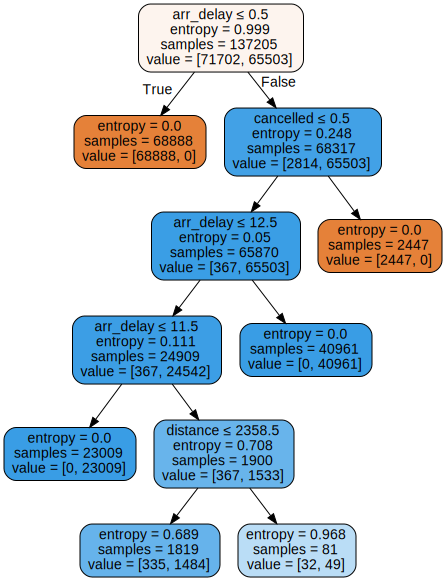

In [ ]:
# DOT data
dot_data = tree.export_graphviz(decision_classifier, out_file=None,feature_names=features, filled=True,rounded=True,special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


### Random forest

In [ ]:
#Import Library
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest object
forest_classifier = RandomForestClassifier()

# Train the model using the training sets and check score
forest_classifier.fit(pred_train,tar_train)

#Predict Output
forest_predicated = forest_classifier.predict(pred_test)

#### Random forest graph

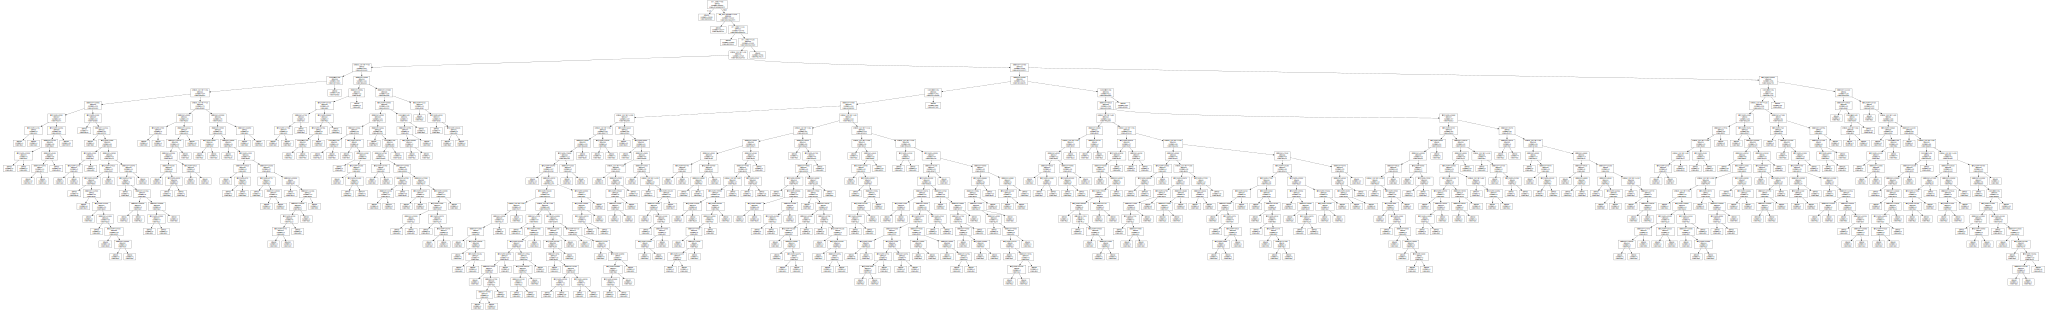

In [ ]:
# DOT data
dot_data = export_graphviz(forest_classifier.estimators_[0], out_file=None,feature_names = features,precision = 2, filled = False)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logregression_classifier = LogisticRegression()

logregression_classifier.fit(pred_train, tar_train)

logregression_predicated = logregression_classifier.predict(pred_test)

### SVM (Support Vector Machine)

In [ ]:
# from sklearn import svm

# #svm_classifier = svm.SVC(kernel='rbf',probability=True, C=100, gamma=100)  : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# #svm_classifier = svm.SVC()
# svm_classifier = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

# svm_classifier.fit(pred_train,tar_train)

# svm_predicated = svm_classifier.predict(pred_test)

# #accuracy
# svm_classifier_acuracy = accuracy_score(tar_test, svm_predicated, normalize = True)

### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=1, max_iter=100)
mlp_classifier.fit(pred_train,tar_train)

mlp_predicated = mlp_classifier.predict(pred_test)

#accuracy gg
mlp_classifier_acuracy = accuracy_score(tar_test, mlp_predicated, normalize = True)

### *Calculation of parameters to compare models*

In [ ]:
#Decision tree
decision_tree_matrix = compute_confusion_matrix(tar_test,decision_tree_predicated)

#Accuracy formula = (TN+TP)/All
decision_classifier_acuracy = (decision_tree_matrix[0,0]+decision_tree_matrix[1,1])/(decision_tree_matrix[0,0]+decision_tree_matrix[0,1]+decision_tree_matrix[1,0]+decision_tree_matrix[1,1])
#Error rate
decision_classifier_error = 1- decision_classifier_acuracy 
#Recall(Sensitivity)
decision_classifier_sensitivity = (decision_tree_matrix[0,0])/(decision_tree_matrix[0,0]+decision_tree_matrix[0,1])
#Specificity
decision_classifier_specificity = (decision_tree_matrix[0,0])/(decision_tree_matrix[0,0]+decision_tree_matrix[1,0])

print("Decision tree\n")

print("Accuracy:",decision_classifier_acuracy)

print("Classification error:",decision_classifier_error)

print("Sensitivity:", decision_classifier_sensitivity)

print("Specificity:",decision_classifier_specificity)

#Random forest
random_forest_matrix = compute_confusion_matrix(tar_test,forest_predicated)

#Accuracy formula = (TN+TP)/All
forest_classifier_acuracy = (random_forest_matrix[0,0]+random_forest_matrix[1,1])/(random_forest_matrix[0,0]+random_forest_matrix[0,1]+random_forest_matrix[1,0]+random_forest_matrix[1,1])
#Error rate
forest_classifier_error = 1- forest_classifier_acuracy 
#Recall(Sensitivity)
forest_classifier_sensitivity = (random_forest_matrix[0,0])/(random_forest_matrix[0,0]+random_forest_matrix[0,1])
#Specificity
forest_classifier_specificity = (random_forest_matrix[0,0])/(random_forest_matrix[0,0]+random_forest_matrix[1,0])

print("\nRandom forest")
print("Accuracy:",forest_classifier_acuracy)

print("Classification error:",forest_classifier_error)

print("sensitivity:", forest_classifier_sensitivity)

print("specificity:",forest_classifier_specificity)

#Logestic Regression
logestic_regression_matrix = compute_confusion_matrix(tar_test,logregression_predicated)

#Accuracy formula = (TN+TP)/All
logregression_classifier_acuracy = (logestic_regression_matrix[0,0]+logestic_regression_matrix[1,1])/(logestic_regression_matrix[0,0]+logestic_regression_matrix[0,1]+logestic_regression_matrix[1,0]+logestic_regression_matrix[1,1])
#Error rate
logregression_classifier_error = 1- logregression_classifier_acuracy 
#Recall(Sensitivity)
logregression_classifier_sensitivity = (logestic_regression_matrix[0,0])/(logestic_regression_matrix[0,0]+logestic_regression_matrix[0,1])
#Specificity
logregression_classifier_specificity = (logestic_regression_matrix[0,0])/(logestic_regression_matrix[0,0]+logestic_regression_matrix[1,0])

print("\nLogestic Regression")
print("Accuracy:",logregression_classifier_acuracy)

print("Classification error:",1-logregression_classifier_acuracy)

print("Sensitivity:", logregression_classifier_sensitivity)

print("Specificity:",logregression_classifier_specificity)

# #SVM
# svm_matrix = compute_confusion_matrix(tar_test,svm_predicated)
# #Accuracy formula = (TN+TP)/All
# svm_classifier_acuracy = (svm_matrix[0,0]+svm_matrix[1,1])/(svm_matrix[0,0]+svm_matrix[0,1]+svm_matrix[1,0]+svm_matrix[1,1])
# #Error rate
# svm_classifier_error = 1- svm_classifier_acuracy 
# #Recall(Sensitivity)
# svm_classifier_sensitivity = (svm_matrix[0,0])/(svm_matrix[0,0]+svm_matrix[0,1])
# #Specificity
# svm_classifier_specificity = (svm_matrix[0,0])/(svm_matrix[0,0]+svm_matrix[1,0])

# print("\nSVM")

# print("Accuracy:",svm_classifier_acuracy)

# print("Classification Error:",svm_classifier_error)

# print("Sensitivity:", svm_classifier_sensitivity)

# print("Specificity:",svm_classifier_specificity)

#Neural network
mlp_matrix = compute_confusion_matrix(tar_test,mlp_predicated)

#Accuracy formula = (TN+TP)/All
mlp_classifier_acuracy = (mlp_matrix[0,0]+ mlp_matrix[1,1])/(mlp_matrix[0,0]+ mlp_matrix[0,1]+ mlp_matrix[1,0]+ mlp_matrix[1,1])
#Error rate
mlp_classifier_error = 1- mlp_classifier_acuracy 
#Recall(Sensitivity)
mlp_classifier_sensitivity = (mlp_matrix[0,0])/(mlp_matrix[0,0]+mlp_matrix[0,1])
#Specificity
mlp_classifier_specificity = (mlp_matrix[0,0])/(mlp_matrix[0,0]+mlp_matrix[1,0])


#confusion_matrices = [decision_tree_matrix,random_forest_matrix,logestic_regression_matrix,svm_matrix,mlp_matrix]
confusion_matrices = [decision_tree_matrix,random_forest_matrix,logestic_regression_matrix,mlp_matrix]

print("\nNeural Network")

print("Accuracy:",mlp_classifier_acuracy)

print("Classification error:",mlp_classifier_error)

print("Sensitivity:", mlp_classifier_sensitivity)

print("Specificity:",mlp_classifier_specificity)


Decision tree

Accuracy: 0.997179403082978
Classification error: 0.002820596917021967
Sensitivity: 0.9946223111555778
Specificity: 1.0

Random forest
Accuracy: 0.9965015852191975
Classification error: 0.0034984147808024835
sensitivity: 0.9951225612806404
specificity: 0.998201890106214

Logestic Regression
Accuracy: 0.997179403082978
Classification error: 0.002820596917021967
Sensitivity: 0.9946223111555778
Specificity: 1.0

Neural Network
Accuracy: 0.9287635290259101
Classification error: 0.07123647097408992
Sensitivity: 0.987076871769218
Specificity: 0.8892811537594832


#### *Confusion Matrix*

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/li

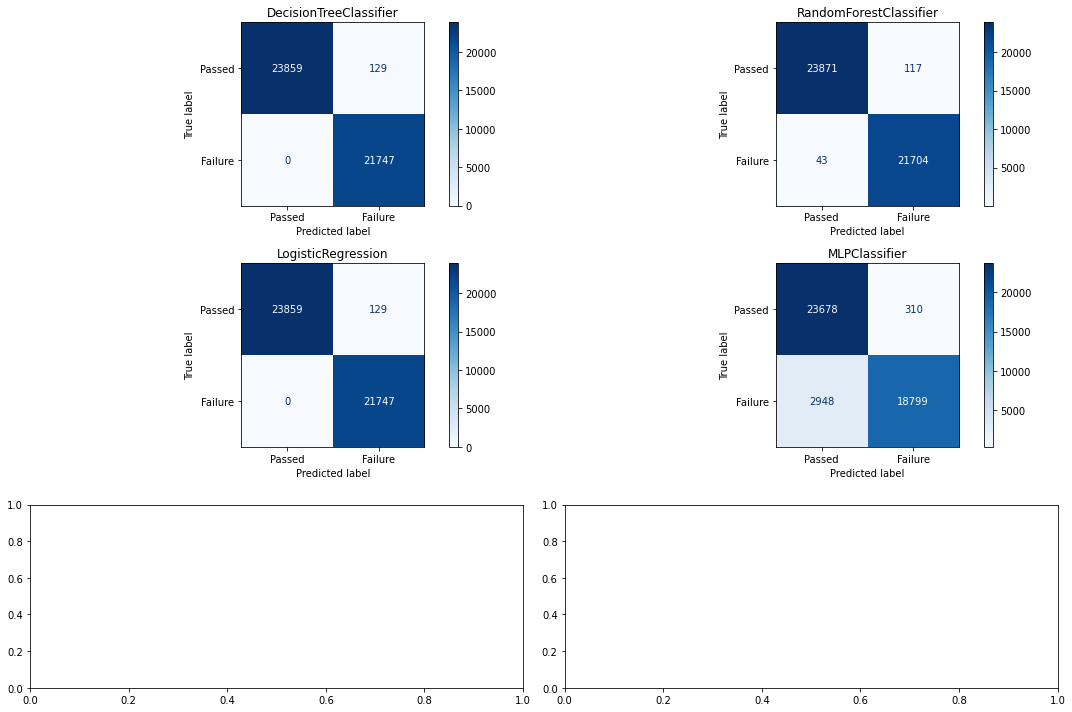

In [ ]:
#classifiers = [decision_classifier, forest_classifier,logregression_classifier, svm_classifier,mlp_classifier]
classifiers = [decision_classifier, forest_classifier,logregression_classifier,mlp_classifier]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
i=0
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, pred_test, tar_test, ax=ax, cmap='Blues', display_labels=['Passed','Failure'])
    ax.title.set_text(type(cls).__name__)
   
plt.tight_layout()  
plt.show()

### <a name="Validation-Chart"><h1><b>Models validation chart</b></h1></a>

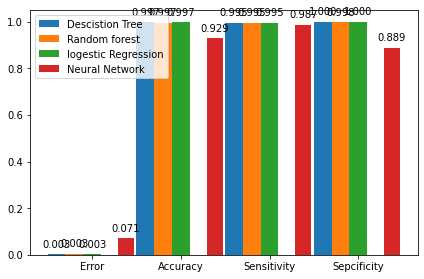

In [ ]:
labels = ["Error","Accuracy","Sensitivity","Sepcificity"]

d = [decision_classifier_error,decision_classifier_acuracy,decision_classifier_sensitivity,decision_classifier_specificity]

f = [forest_classifier_error,forest_classifier_acuracy,forest_classifier_sensitivity,forest_classifier_specificity]

l = [logregression_classifier_error,logregression_classifier_acuracy,logregression_classifier_sensitivity,logregression_classifier_specificity]

#s = [svm_classifier_error,svm_classifier_acuracy,svm_classifier_sensitivity,svm_classifier_specificity]

m = [mlp_classifier_error,mlp_classifier_acuracy,mlp_classifier_sensitivity,mlp_classifier_specificity]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x -2*width, d, width, label='Descistion Tree')

rects2 = ax.bar(x -1*width , f, width, label='Random forest')

rects3 = ax.bar(x  , l, width, label='logestic Regression')

#rects4 = ax.bar(x + 1*width, s, width, label='SVM')

rects5 = ax.bar(x + 2*width-0.02, m, width-0.02, label='Neural Network')

plt.rcParams["figure.figsize"] = [10, 10]
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax.legend()
add_value_labels(ax)

fig.tight_layout()

plt.show()

### <a name="ROC-CURVES"><h1><b>ROC curves</b></h1></a>

In [ ]:
plot_ROC(y_onehot_test[:, 0],decistion_tree_y_score[:, class_id],"Decistion Tree")

NameError: ignored

In [ ]:
plot_ROC(y_onehot_test[:, 0],forest_y_score[:, class_id],"Random Forest")

In [ ]:
plot_ROC(y_onehot_test[:, 0],regression_y_score[:, class_id],"Logestic Regression")

In [ ]:
#plot_ROC(y_onehot_test[:, 0],svm_y_score[:, class_id],"SVM")

In [ ]:
plot_ROC(y_onehot_test[:, 0],mlp_y_score[:, class_id],"Neural Network")